# Remaining Life Prediction for Turbofan Engine - Regression

## Data Exploration

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from turbofan_importFDdata import turbofan_importFDdata

**Loading the dataset FD002**

In [32]:
data = turbofan_importFDdata('train_FD002.txt')
data

,Unit,Time,Setting1,Setting2,Setting3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPres,...,FuelFlowRatio,CorrFanSpeed,CorrCoreSpeed,BypassRatio,BurnerFuelAirRatio,BleedEnthalpy,DemandFanSpeed,DemandCorrFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


**Overview on all sensor measurments for all units**

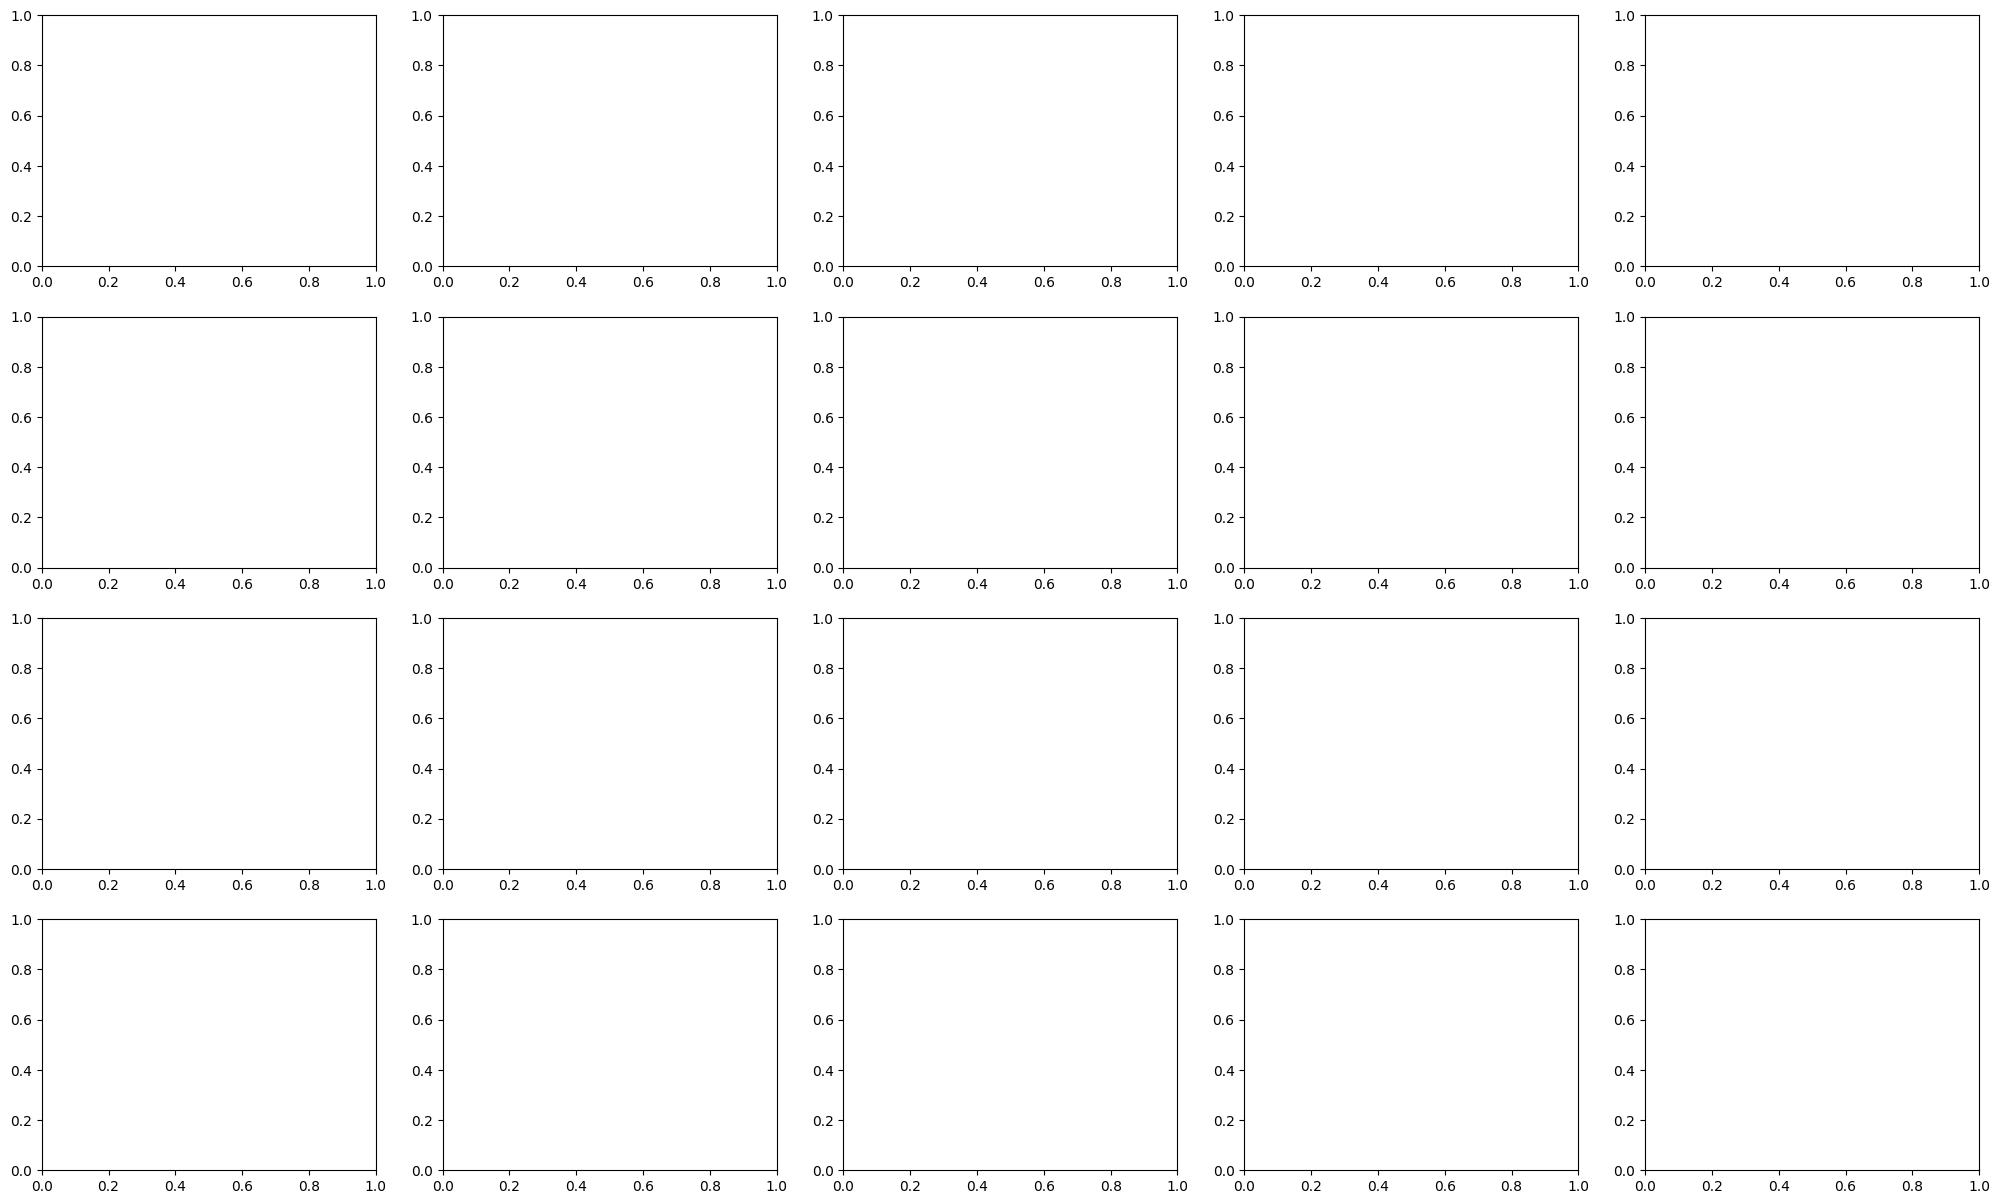

In [33]:
fig, axs = plt.subplots(4, 5)
fig.set_figheight(15)
fig.set_figwidth(25)

# iterate over units

#for u in range(260): 
#    # iterate over sensor measurments
#    for s in range(5):
#        axs[0,s].scatter(data.loc[data.Unit==u+1, 'Time'], data.loc[data.Unit==u+1, data.columns[s+5]])
#        axs[0,s].set_title(data.columns[s+5])
#    for s in range(5): 
#        axs[1,s].scatter(data.loc[data.Unit==u+1, 'Time'], data.loc[data.Unit==u+1, data.columns[s+10]])
#        axs[1,s].set_title(data.columns[s+10])
#    for s in range(5):
#        axs[2,s].scatter(data.loc[data.Unit==u+1, 'Time'], data.loc[data.Unit==u+1, data.columns[s+15]])
#        axs[2,s].set_title(data.columns[s+15])
#    for s in range(5):
#        axs[3,s].scatter(data.loc[data.Unit==u+1, 'Time'], data.loc[data.Unit==u+1, data.columns[s+20]])
#        axs[3,s].set_title(data.columns[s+20])

**Determining the operation mode from the operational Settings**  
We can compute and round the average of the three settings to determine the different operation modes:

In [34]:
modi = np.round((data.loc[:,'Setting1'] + data.loc[:,'Setting2'] + data.loc[:,'Setting3']) /3)
print(f'Unique modes: {modi.unique()}')

Unique modes: [45. 48. 29. 40. 33. 37.]


We can also view that by clustering the settings:

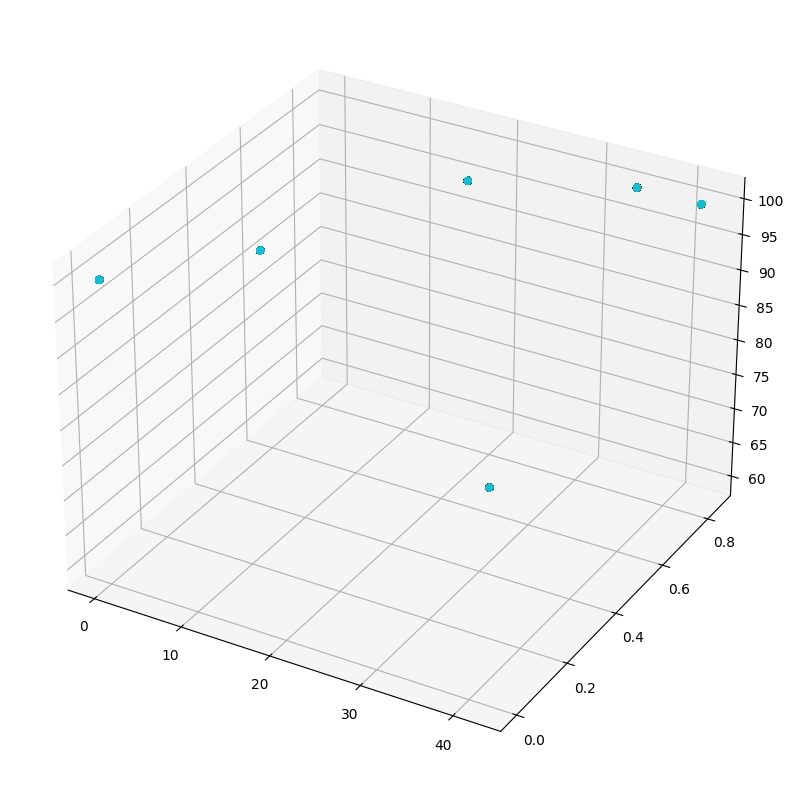

In [35]:
data_per_engine = data.groupby('Unit')
data_per_engine = [data_per_engine.get_group(x) for x in data_per_engine.groups]

fig = plt.figure(figsize=(10, 10))
#add 3d scatter plot
ax = fig.add_subplot(111, projection='3d')
for i, engine_data in enumerate(data_per_engine):
    ax.scatter(engine_data['Setting1'], engine_data['Setting2'], engine_data['Setting3'])

We now add a column containing the operation mode:

In [36]:
data.drop('Setting1', inplace=True, axis=1)
data.drop('Setting2', inplace=True, axis=1)
data.drop('Setting3', inplace=True, axis=1)
data.insert(2, 'Modi', modi)
data.loc[data.Modi == 29, 'Modi'] = 1
data.loc[data.Modi == 33, 'Modi'] = 2
data.loc[data.Modi == 37, 'Modi'] = 3
data.loc[data.Modi == 40, 'Modi'] = 4
data.loc[data.Modi == 45, 'Modi'] = 5
data.loc[data.Modi == 48, 'Modi'] = 6

In [37]:
data

,Unit,Time,Modi,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPres,BypassDuctPres,TotalHPCOutletPres,...,FuelFlowRatio,CorrFanSpeed,CorrCoreSpeed,BypassRatio,BurnerFuelAirRatio,BleedEnthalpy,DemandFanSpeed,DemandCorrFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,5.0,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,6.0,445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,1.0,462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,6.0,445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,1.0,462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,4.0,491.19,608.79,1495.60,1269.51,9.35,13.66,334.00,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,3.0,489.05,605.81,1514.32,1324.12,10.52,15.50,392.46,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,1.0,462.54,537.48,1276.24,1057.92,7.05,9.04,175.11,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,1.0,462.54,537.84,1272.95,1066.30,7.05,9.04,174.81,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


## Data Preparation
**Shift the time variable to a count down timer for remaining cycles to failure**

In [38]:
for i in range(1,261):
    data.loc[data.Unit == i] = data.loc[data.Unit == i].assign(Time=data.loc[data.Unit == i].loc[:,"Time"].max()-data.loc[data.Unit == i].loc[:,"Time"])

**Data Standardization**

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.concat([data.iloc[:,0:3], pd.DataFrame(scaler.fit_transform(data.iloc[:,3:]))], axis=1)

**Add labels to the instances of the training set reflecting urgency indicators**

In [40]:
data = data.assign(Urgency = pd.cut(data['Time'], bins=[-1, 51, 126, 201, 1000], labels=['Urg', 'Short', 'Med', 'Long']))
data

,Unit,Time,Modi,0,1,2,3,4,5,6,...,12,13,14,15,16,17,18,19,20,Urgency
0,1,148,5.0,-0.889378,-0.653071,-0.579176,-0.572622,-0.706177,-0.662907,-0.602496,...,0.415116,-0.212615,0.021948,-0.705933,-0.515579,-0.039954,0.418187,-0.613958,-0.619148,Med
1,1,147,6.0,-1.057627,-0.798422,-0.630051,-0.668741,-1.140622,-1.084502,-0.986938,...,0.414648,0.067215,0.063719,-0.705933,-0.659701,-0.115645,0.418187,-1.051681,-1.048190,Med
2,1,146,1.0,-0.392968,-1.136055,-1.540521,-1.326301,-0.271732,-0.475122,-0.732150,...,-2.393490,-2.377822,2.087798,-0.705933,-1.416342,-2.159318,-2.391275,-0.679819,-0.641912,Med
3,1,145,6.0,-1.057627,-0.808881,-0.622406,-0.663705,-1.140622,-1.084502,-0.987280,...,0.414257,0.024309,0.030890,-0.705933,-0.695731,-0.115645,0.418187,-1.033443,-1.013808,Med
4,1,144,1.0,-0.392968,-1.142491,-1.531554,-1.322271,-0.271732,-0.473281,-0.736670,...,-2.393724,-2.420728,2.090734,-0.705933,-1.416342,-2.159318,-2.391275,-0.674753,-0.666180,Med
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,4,4.0,0.692693,0.780862,0.713849,0.537834,0.364716,0.379114,0.351999,...,0.425267,1.214589,-0.034903,1.416565,0.745489,0.655032,0.418187,0.361801,0.345429,Urg
53755,260,3,3.0,0.611600,0.700946,0.890544,0.996270,0.688475,0.717863,0.752399,...,0.420582,2.107123,-0.762087,1.416565,0.925641,0.620627,0.418187,0.740757,0.755203,Urg
53756,260,2,1.0,-0.392968,-1.131496,-1.356652,-1.238408,-0.271732,-0.471440,-0.736259,...,-2.375530,-1.123891,2.316803,-0.705933,-1.380311,-2.159318,-2.391275,-0.668673,-0.662515,Urg
53757,260,1,1.0,-0.392968,-1.121841,-1.387706,-1.168060,-0.271732,-0.471440,-0.738314,...,-2.375374,-1.109510,2.300789,-0.705933,-1.344281,-2.159318,-2.391275,-0.682859,-0.692473,Urg


## Modeling & Training

## Testing